Ported from http://ag1000g-dev.cggh.org/repo/notebooks/20150929_diagnostic_markers_neaf_plot_paper.html

In [1]:
%run setup.ipynb

In [2]:
%matplotlib inline

In [3]:
contigs = ('X', '3R', '3L', '2R', '2L')
samples = phase1_ar3.tbl_samples.cut(1, 4, 6, 'm_s')
samples

0|ox_code,1|population,2|region,3|m_s
AB0085-C,BFS,Pala,S
AB0087-C,BFM,Bana,M
AB0088-C,BFM,Bana,M
AB0089-C,BFM,Bana,M
AB0090-C,BFM,Bana,M


In [4]:
agam = phase1_ar3.genome

In [5]:
fn_neaf_markers = '/kwiat/vector/ag1000g/release/phase1.AR3/extras/neaf_markers/1run_%s.tab'

In [6]:
tbl = {chrom: (etl.fromtsv(fn_neaf_markers % chrom, delimiter='\t')
               .rename('sample', 'ox_code')
               .rename('SS', 'SS_%s' % chrom)
               .convert('SS_%s' % chrom, int)) for chrom in contigs}

tbl_genome = (tbl['X'].join(tbl['2R'], key='ox_code')
              .join(tbl['2L'], key='ox_code')
              .join(tbl['3R'], key='ox_code')
              .join(tbl['3L'], key='ox_code')
              .join(samples, key='ox_code')  
              )

tbl_genome

0|ox_code,1|molecular_type,2|MM,3|SS_X,4|MS,5|missing,6|other,7|X:4144,8|X:43831,9|X:15100037,10|X:15102030,11|X:15122298,12|X:15152322,13|X:15265556,14|X:15469805,15|X:15654817,16|X:15904818,17|X:15931132,18|X:15933212,19|X:15935327,20|X:15937755,21|X:17201100,22|X:17203086,23|X:17211289,24|X:17371331,25|X:17413658,26|X:17655806,27|X:17673204,28|X:17691764,29|X:17707969,30|X:17750600,31|X:17758240,32|X:17767738,33|X:17802089,34|X:17804078,35|X:17818460,36|X:17819878,37|X:17822430,38|X:17829586,39|X:17839055,40|X:17854770,41|X:17855890,42|X:17863952,43|X:17877673,44|X:17883470,45|X:17892553,46|X:17906226,47|X:17907713,48|X:17919967,49|X:17921848,50|X:17922361,51|X:17922652,52|X:17930970,53|X:17936437,54|X:17950636,55|X:17974469,56|X:17974772,57|X:18013323,58|X:18015016,59|X:18031772,60|X:18043476,61|X:18046469,62|X:18055878,63|X:18064888,64|X:18069465,65|X:18081652,66|X:18093475,67|X:18098910,68|X:18102566,69|X:18144827,70|X:18145980,71|X:18146820,72|X:18151779,73|X:18193109,74|X:18213254,75|X:18231178,76|X:18243004,77|X:18244075,78|X:18244214,79|X:18255024,80|X:18259640,81|X:18259666,82|X:18260913,83|X:18296187,84|X:18320057,85|X:18351413,86|X:18358985,87|X:18359371,88|X:18372750,89|X:18372852,90|X:18372890,91|X:18376928,92|X:18405644,93|X:18415090,94|X:18416362,95|X:18418071,96|X:18419070,97|X:18439071,98|X:18451087,99|X:18451490,100|X:18474471,101|X:18483223,102|X:18483308,103|X:18488749,104|X:18494213,105|X:18503755,106|X:18506770,107|X:18514224,108|X:18534685,109|X:18535307,110|X:18541695,111|X:18545950,112|X:18553766,113|X:18561007,114|X:18597532,115|X:18616815,116|X:18633609,117|X:18664320,118|X:18666391,119|X:18666995,120|X:18667110,121|X:18673482,122|X:18681536,123|X:18709711,124|X:18715423,125|X:18721037,126|X:18733692,127|X:18736537,128|X:18738010,129|X:18738227,130|X:18739073,131|X:18751643,132|X:18752247,133|X:18756071,134|X:18756937,135|X:18758300,136|X:18768526,137|X:18769165,138|X:18772627,139|X:18777403,140|X:18778473,141|X:18779655,142|X:18782469,143|X:18803767,144|X:18841196,145|X:18850598,146|X:18850788,147|X:18855100,148|X:18875872,149|X:18876416,150|X:18883085,151|X:18883338,152|X:18888979,153|X:18891859,154|X:18985260,155|X:19005798,156|X:19117756,157|X:19154757,158|X:19174276,159|X:19174735,160|X:19208510,161|X:19227341,162|X:19263223,163|X:19263806,164|X:19275911,165|X:19300779,166|X:19301398,167|X:19305628,168|X:19440618,169|X:19519687,170|X:19529503,171|X:19529806,172|X:19554201,173|X:19555085,174|X:19569364,175|X:19569839,176|X:19605776,177|X:19609315,178|X:19612071,179|X:19619051,180|X:19627490,181|X:19630571,182|X:19631429,183|X:19631625,184|X:19632267,185|X:19633607,186|X:19641255,187|X:19643251,188|X:19648745,189|X:19649825,190|X:19650465,191|X:19653831,192|X:19655218,193|X:19658441,194|X:19659462,195|X:19661079,196|X:19668644,197|X:19671378,198|X:19704860,199|X:19705887,200|X:19710357,201|X:19712176,202|X:19712866,203|X:19716539,204|X:19725156,205|X:19731241,206|X:19732984,207|X:19735812,208|X:19737928,209|X:19770048,210|X:19771211,211|X:19771979,212|X:19773913,213|X:19776018,214|X:19808574,215|X:19818055,216|X:19825227,217|X:19835133,218|X:19836117,219|X:19837576,220|X:19848422,221|X:19849243,222|X:19850268,223|X:19853409,224|X:19853649,225|X:19854380,226|X:19855512,227|X:19857473,228|X:19865560,229|X:19865723,230|X:19869654,231|X:19878888,232|X:19889029,233|X:19907496,234|X:19907655,235|X:19926288,236|X:19926762,237|X:19936493,238|X:19963776,239|X:19970630,240|X:19971453,241|X:19972120,242|X:19984239,243|X:19989651,244|X:19991095,245|X:19996358,246|X:20007133,247|X:20009203,248|X:20010584,249|X:20011785,250|X:20011891,251|X:20014696,252|X:20015293,253|X:20015634,254|X:20016494,255|X:20063553,256|X:20117226,257|X:20128328,258|X:20128465,259|X:20128719,260|X:20129288,261|X:20136659,262|X:20138331,263|X:20143470,264|X:20147987,265|X:20151732,266|X:20154269,267|X:20155233,268|X:20360797,269|X:20364269,270|X:20408988,271|X:20636715,272|X:20640231,273|X:20708775,274|X:20749100,275|X:20759443,276|X:

In [7]:
outliers = tbl_genome.select(lambda r: r.ox_code == 'AJ0045-C' or r.ox_code == 'AJ0063-C')

In [8]:
outliers_2 = tbl_genome.select(lambda r: r.ox_code == 'AJ0085-C' or r.ox_code == 'AJ0115-C')

In [9]:
outlier_single_island = tbl_genome.select(lambda r: r.ox_code == 'AJ0107-C')

In [10]:
outlier_single_X = tbl_genome.select(lambda r: r.ox_code == 'AJ0090-C')

In [11]:
pos_x = np.array([h[2:]  for h in etl.fromtsv(fn_neaf_markers % 'X').header() if h.startswith('X')])
pos = {chrom: np.array([h[3:]  for h in etl.fromtsv(fn_neaf_markers % chrom).header() if h.startswith(chrom)]) for chrom in contigs[1:]}
pos['X'] = pos_x
pos

{'2L': array(['181564', '210286', '494285', '742146', '743371', '770749',
        '771465', '772056', '856860', '927247', '955705', '955907',
        '987059', '1003551', '1057910', '1059325', '1205929', '1275323',
        '1275498', '1299662', '1328734', '1329290', '1330010', '1330524',
        '1418210', '1534525', '1543727', '1549512', '1569012', '1570427',
        '1571929', '1574428', '1773285', '1774816', '1776348', '1834975',
        '1929057', '1929179', '1936042', '1947574', '2005557', '2050540',
        '2050720', '2076066', '2076374', '2079153', '2080181', '2081855',
        '2108038', '2120222', '2121185', '2250268', '2288180', '2288436',
        '2381386', '2400620', '2435532', '2439735', '2440600', '2729028',
        '2825181', '7007278', '11245789', '11475283', '11554511', '11870350'], 
       dtype='<U8'),
 '2R': array(['5896279', '7978367', '9641935', '11060650', '11187397', '11232433',
        '17867695', '29027132', '29174959', '29194643', '38412280',
        '391033

In [12]:
tbl_kdr = (
    etl
    .fromtsv('/kwiat/vector/ag1000g/release/phase1.AR3/extras/neaf_markers/dis_kdr_phase1_summary.txt')
    .cut('ox_code', 'kdr', 'PCR_type')
)
tbl_kdr.display()

0|ox_code,1|kdr,2|PCR_type
AB0085-C,phe/phe,S
AB0087-C,leu/phe,M
AB0088-C,phe/phe,M
AB0089-C,phe/phe,M
AB0090-C,leu/phe,M


In [13]:
tbl_genome = tbl_genome.selecteq('population', "KES")
tbl_genome

0|ox_code,1|molecular_type,2|MM,3|SS_X,4|MS,5|missing,6|other,7|X:4144,8|X:43831,9|X:15100037,10|X:15102030,11|X:15122298,12|X:15152322,13|X:15265556,14|X:15469805,15|X:15654817,16|X:15904818,17|X:15931132,18|X:15933212,19|X:15935327,20|X:15937755,21|X:17201100,22|X:17203086,23|X:17211289,24|X:17371331,25|X:17413658,26|X:17655806,27|X:17673204,28|X:17691764,29|X:17707969,30|X:17750600,31|X:17758240,32|X:17767738,33|X:17802089,34|X:17804078,35|X:17818460,36|X:17819878,37|X:17822430,38|X:17829586,39|X:17839055,40|X:17854770,41|X:17855890,42|X:17863952,43|X:17877673,44|X:17883470,45|X:17892553,46|X:17906226,47|X:17907713,48|X:17919967,49|X:17921848,50|X:17922361,51|X:17922652,52|X:17930970,53|X:17936437,54|X:17950636,55|X:17974469,56|X:17974772,57|X:18013323,58|X:18015016,59|X:18031772,60|X:18043476,61|X:18046469,62|X:18055878,63|X:18064888,64|X:18069465,65|X:18081652,66|X:18093475,67|X:18098910,68|X:18102566,69|X:18144827,70|X:18145980,71|X:18146820,72|X:18151779,73|X:18193109,74|X:18213254,75|X:18231178,76|X:18243004,77|X:18244075,78|X:18244214,79|X:18255024,80|X:18259640,81|X:18259666,82|X:18260913,83|X:18296187,84|X:18320057,85|X:18351413,86|X:18358985,87|X:18359371,88|X:18372750,89|X:18372852,90|X:18372890,91|X:18376928,92|X:18405644,93|X:18415090,94|X:18416362,95|X:18418071,96|X:18419070,97|X:18439071,98|X:18451087,99|X:18451490,100|X:18474471,101|X:18483223,102|X:18483308,103|X:18488749,104|X:18494213,105|X:18503755,106|X:18506770,107|X:18514224,108|X:18534685,109|X:18535307,110|X:18541695,111|X:18545950,112|X:18553766,113|X:18561007,114|X:18597532,115|X:18616815,116|X:18633609,117|X:18664320,118|X:18666391,119|X:18666995,120|X:18667110,121|X:18673482,122|X:18681536,123|X:18709711,124|X:18715423,125|X:18721037,126|X:18733692,127|X:18736537,128|X:18738010,129|X:18738227,130|X:18739073,131|X:18751643,132|X:18752247,133|X:18756071,134|X:18756937,135|X:18758300,136|X:18768526,137|X:18769165,138|X:18772627,139|X:18777403,140|X:18778473,141|X:18779655,142|X:18782469,143|X:18803767,144|X:18841196,145|X:18850598,146|X:18850788,147|X:18855100,148|X:18875872,149|X:18876416,150|X:18883085,151|X:18883338,152|X:18888979,153|X:18891859,154|X:18985260,155|X:19005798,156|X:19117756,157|X:19154757,158|X:19174276,159|X:19174735,160|X:19208510,161|X:19227341,162|X:19263223,163|X:19263806,164|X:19275911,165|X:19300779,166|X:19301398,167|X:19305628,168|X:19440618,169|X:19519687,170|X:19529503,171|X:19529806,172|X:19554201,173|X:19555085,174|X:19569364,175|X:19569839,176|X:19605776,177|X:19609315,178|X:19612071,179|X:19619051,180|X:19627490,181|X:19630571,182|X:19631429,183|X:19631625,184|X:19632267,185|X:19633607,186|X:19641255,187|X:19643251,188|X:19648745,189|X:19649825,190|X:19650465,191|X:19653831,192|X:19655218,193|X:19658441,194|X:19659462,195|X:19661079,196|X:19668644,197|X:19671378,198|X:19704860,199|X:19705887,200|X:19710357,201|X:19712176,202|X:19712866,203|X:19716539,204|X:19725156,205|X:19731241,206|X:19732984,207|X:19735812,208|X:19737928,209|X:19770048,210|X:19771211,211|X:19771979,212|X:19773913,213|X:19776018,214|X:19808574,215|X:19818055,216|X:19825227,217|X:19835133,218|X:19836117,219|X:19837576,220|X:19848422,221|X:19849243,222|X:19850268,223|X:19853409,224|X:19853649,225|X:19854380,226|X:19855512,227|X:19857473,228|X:19865560,229|X:19865723,230|X:19869654,231|X:19878888,232|X:19889029,233|X:19907496,234|X:19907655,235|X:19926288,236|X:19926762,237|X:19936493,238|X:19963776,239|X:19970630,240|X:19971453,241|X:19972120,242|X:19984239,243|X:19989651,244|X:19991095,245|X:19996358,246|X:20007133,247|X:20009203,248|X:20010584,249|X:20011785,250|X:20011891,251|X:20014696,252|X:20015293,253|X:20015634,254|X:20016494,255|X:20063553,256|X:20117226,257|X:20128328,258|X:20128465,259|X:20128719,260|X:20129288,261|X:20136659,262|X:20138331,263|X:20143470,264|X:20147987,265|X:20151732,266|X:20154269,267|X:20155233,268|X:20360797,269|X:20364269,270|X:20408988,271|X:20636715,272|X:20640231,273|X:20708775,274|X:20749100,275|X:20759443,276|X:

In [14]:
import popgen

analysis = popgen.analysis.PopulationAnalysis('../data/analysis')
analysis

<PopulationAnalysis at '../data/analysis'>

In [15]:
populations = analysis.config.get("populations").keys()

In [16]:
def select_pop(pop_name):
    
    tbl = (tbl_genome.selecteq('region', pop_name)
           .join(tbl_kdr, key='ox_code')
           .addfield('SS', lambda x: x.SS_X + x.SS_2L + x.SS_3L + x.SS_2R + x.SS_3R)
           .sort('SS'))
    # take only Savannah
#     if pop_name == 'CMS':
#         tbl = tbl.select(lambda r: r.region == 'Zembe-Borongo' or r.region == 'Gado-Badzere').sort('SS')
    return tbl

In [17]:
def split_tables_return_arrays(tbl):
    
    header = tbl.header()
    header_X = [h for h in header if h.startswith('X')]
    tbl_X = tbl.cut(*header_X)
    header_2R = [h for h in header if h.startswith('2R')]
    tbl_2R = tbl.cut(*header_2R)
    header_2L = [h for h in header if h.startswith('2L')]
    tbl_2L = tbl.cut(*header_2L)
    header_3R = [h for h in header if h.startswith('3R')]
    tbl_3R = tbl.cut(*header_3R)
    header_3L = [h for h in header if h.startswith('3L')]
    tbl_3L = tbl.cut(*header_3L)
    tbl_kdr = tbl.cut('kdr')
    tbl_pcr = tbl.cut('PCR_type')
    
    C_X  = np.array(tbl_X.data())
    C_2R = np.array(tbl_2R.data())
    C_2L = np.array(tbl_2L.data())
    C_3R = np.array(tbl_3R.data())
    C_3L = np.array(tbl_3L.data())
    C_kdr = np.array(tbl_kdr.data())
    C_pcr = np.array(tbl_pcr.data())
    C = np.hstack((C_X, C_2R, C_2L, C_3R, C_3L))
    return C_X, C_2R, C_2L, C_3R, C_3L, C_kdr, C_pcr, C

In [18]:
def plot_DIS(tbl, chromosome):
    cMap = mpl.colors.ListedColormap(['k', 'b', 'r', 'y', 'c', 'm', 'w', 'g', 'burlywood', 'chartreuse'])
    plt.pcolormesh(tbl, vmin = -1, vmax = +8, cmap = cMap)
    #title(chromosome, fontsize=16)
    #ylabel('%s samples' % tbl.shape[0])
    y_max = tbl.shape[0]
    plt.ylim(0, y_max)
    x_max = tbl.shape[1]
    plt.xlim(0, x_max)
#     plt.rcParams['font.family'] = 'Arial'
#     plt.rcParams['font.size'] = 10
#     plt.rcParams['ytick.direction'] = 'out'
#     plt.rcParams['xtick.direction'] = 'out'

In [19]:
C_X, C_2R, C_2L, C_3R, C_3L, _, _, C = split_tables_return_arrays(select_pop("Kilifi-Junju"))
print('Diagnostic markers chrom X: ', C_X.shape[1])
print('Diagnostic markers chrom 2R: ', C_2R.shape[1])
print('Diagnostic markers chrom 2L: ', C_2L.shape[1])
print('Diagnostic markers chrom 3R: ', C_3R.shape[1])
print('Diagnostic markers chrom 3L: ', C_3L.shape[1])
print('Diagnostic markers Total: ', C.shape[1])

Diagnostic markers chrom X:  355
Diagnostic markers chrom 2R:  29
Diagnostic markers chrom 2L:  66
Diagnostic markers chrom 3R:  38
Diagnostic markers chrom 3L:  18
Diagnostic markers Total:  506


In [20]:
from collections import OrderedDict
labels_colours = OrderedDict((('missing','k'), 
                              (r'\textit{gambiae}/\textit{gambiae}', 'b'), 
                              (r'\textit{coluzzii}/\textit{coluzzii}', 'r')))
[i for i in labels_colours.keys()]

['missing',
 '\\textit{gambiae}/\\textit{gambiae}',
 '\\textit{coluzzii}/\\textit{coluzzii}']

In [21]:
pop_labels = {p:analysis.config.get_population(p)["label"] for p in populations}

pop_labels

{'junju': 'Kilifi-Junju', 'mbogolo': 'Kilifi-Mbogolo'}

In [22]:
samples.nrows()

765

In [23]:
tbl_genome.nrows()

44

In [24]:
import matplotlib.patches as mpatches
def plot_magnum_split(population_labels, figsize=(8, 7)):
    
    contigs = ('X', '3R', '3L', '2R', '2L')
    
    fig = plt.figure(figsize=figsize)

    rect = None
    for chrom in contigs:
        if rect is None:
            l, b, w, h = 0.03, 0, 0.16, 0.08
            rect = l, b, w, h 
        else:
            l, b, w, h = l + 0.17, 0, 0.16, 0.08
            rect = l, b, w, h 

        ax = fig.add_axes(rect)
        start = 0
        stop = len(agam[chrom]) + 1
        anhima.loc.plot_variant_locator(pos[chrom], step=1, start_position=start, stop_position=stop , ax=ax)
        ax.set_xticks(np.arange(start, stop, 10e6))
        ax.set_xticklabels([str(i)[0] for i in np.arange(start, stop, 10e6)])
        if chrom == '3L':
            ax.set_xlabel('Position ($\\times$10 Mbp)')

    prop = None
    for ix, pop in enumerate(population_labels): 
        
        print(pop)
        cfg = analysis.config.get_population(pop)
        tbl = select_pop(cfg["label"])

        tbl = tbl.convertall({'S' : 0, 'M' : 1, 'M/S' : 2, 'SS' : 0, 'MM' : 1, 'MS' : 2, 'leu/leu' : 3, 'leu/phe' : 4, 'leu/ser' : 5, 
                     'phe/phe' : 6, 'phe/ser' : 7, 'ser/ser' : 8, 'mismatch error' : -1, '' : -1, '??' : -1}) 

        C_X, C_2R, C_2L, C_3R, C_3L, C_kdr, C_pcr, C = split_tables_return_arrays(tbl)

        nsamples = tbl.nrows()

        if prop is None:
            b = 0.1
        else:
            b = b + 0.9 * prop
        prop = (nsamples / tbl_genome.nrows())
        
        rect_pcr = 0.00,              b, 0.02, 0.9 * prop - 0.01
        rect_X =  0.03,               b, 0.16, 0.9 * prop - 0.01
        rect_3R = 0.03 + 0.17,        b, 0.16, 0.9 * prop - 0.01
        rect_3L = 0.03 + (0.17 * 2),  b, 0.16, 0.9 * prop - 0.01
        rect_2R = 0.03 + (0.17 * 3),  b, 0.16, 0.9 * prop - 0.01
        rect_2L = 0.03 + (0.17 * 4),  b, 0.16, 0.9 * prop - 0.01
        rect_kdr = 0.03 + (0.17 * 5),  b, 0.02, 0.9 * prop - 0.01
        rect_anc = 0.03 + (0.17 * 5) + 0.03,  b, 0.04, 0.9 * prop - 0.01
        
#         ax = fig.add_axes(rect_pcr)
#         print(pop, rect_pcr)
#         plot_DIS(C_pcr, 'PCR')
#         ax.set_xticks([])
#         ax.set_yticks([])
#         ax.yaxis.set_ticks_position('left')

        new_labels = pop_labels
        
        

        if pop == 'CMS':
            ax.set_title('PCR')
        
        ax = fig.add_axes(rect_X)
        plot_DIS(C_X, 'X')
        ax.set_xticks([])
        ax.set_yticks([])
        
        if ix == 1:
            ax.set_title('X')
        
        weight='semibold'
        ax.set_ylabel(new_labels[pop], 
                      weight=weight, 
                      rotation='vertical', 
                      horizontalalignment = 'center', 
                      verticalalignment = 'center', 
                      labelpad=10,
                      color='k')
        
        ax = fig.add_axes(rect_3R)
        plot_DIS(C_3R, '3R')
        ax.set_xticks([])
        ax.set_yticks([])
        if ix == 1:
            ax.set_title('3R')
        
        ax = fig.add_axes(rect_3L)
        plot_DIS(C_3L, '3L')
        ax.set_xticks([])
        ax.set_yticks([])
        if ix == 1:
            ax.set_title('3L')
        
        ax = fig.add_axes(rect_2R)
        plot_DIS(C_2R, '2R')
        ax.set_xticks([])
        ax.set_yticks([])
        if ix == 1:
            ax.set_title('2R')
        
        ax = fig.add_axes(rect_2L)
        plot_DIS(C_2L, '2L')
        ax.set_xticks([])
        ax.set_yticks([])
        if ix == 1:
            ax.set_title('2L')
               
        ax = fig.add_axes(rect_kdr)
        plot_DIS(C_kdr, 'KDR')
        ax.set_xticks([])
        ax.set_yticks([])
        if ix == 1:
            ax.set_title(r'$Kdr$')
            
    labels_colours = OrderedDict((('gambiae/gambiae', 'b'), ('coluzzii/coluzzii', 'r'), ('gambiae/coluzzii', 'y'), ('missing','k')))
    
    labels_colours_kdr = OrderedDict((('L/L', 'c'), ('L/S', 'w'), ('S/S', 'chartreuse')))
            
    patches_1 = OrderedDict((item, mpatches.Patch(color=labels_colours[item], label=item, ec='k')) for item in labels_colours.keys())
    
    ax = fig.add_axes([0, .5, 1, .5], facecolor='none')
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(handles=[i for i in patches_1.values()], loc='upper left', bbox_to_anchor=(0.92, 1), title='Species genotype')

    patches_kdr = OrderedDict(
        (item, mpatches.Patch(color=labels_colours_kdr[item], label=item, ec='k')) 
        for item in labels_colours_kdr.keys())
    ax = fig.add_axes([0, 0, 1, .5], facecolor='none')
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.legend(handles=[i for i in patches_kdr.values()], 
              loc='upper left', 
              bbox_to_anchor=(0.92, 1), 
              title=r'$Kdr$ genotype')

    return fig


junju
mbogolo


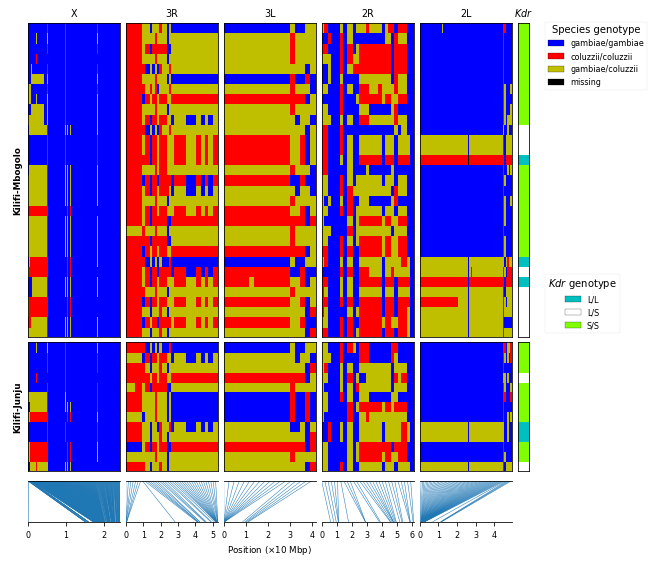

In [25]:
fig = plot_magnum_split(populations)
fig.savefig('../artwork/AIM.jpeg', jpeg_quality=100, dpi=300, bbox_inches='tight')